# **Problem Description and Its Meaning**

**Diabetic Retinopathy (DR)** is the leading cause of blindness among working-age individuals in developed nations, affecting over 93 million people globally. This eye disease is a complication of long-standing diabetes, which is itself a growing epidemic. According to the CDC, 29.1 million Americans have diabetes, and the WHO estimates the global prevalence at 347 million. Of these, approximately 40–45% of diabetic Americans show some stage of DR. Without timely detection and intervention, DR can progress to severe vision impairment or blindness, often with few symptoms until it is too late for effective treatment.

Detection of DR currently relies on manual examination of digital color fundus photographs of the retina by trained clinicians. This approach, while effective, is plagued by several challenges:

- **Time-Intensive Process**: Reviews often take days, delaying communication and treatment.
- **Resource Constraints**: Detection requires specialized expertise and equipment, which are often unavailable in under-resourced areas where diabetes prevalence is high.
- **Growing Burden**: The increasing number of people with diabetes is outpacing the infrastructure needed to prevent blindness caused by DR.

To address these challenges, there is a critical need for a scalable, automated system for DR detection. Such a solution could significantly improve outcomes by enabling early diagnosis and timely treatment.

---

# **Data Collection and Its Importance**

The success of automated detection models heavily depends on the availability and quality of data used for training and validation. In this initiative, retinal images have been provided by **EyePACS**, a free platform for retinopathy screening. EyePACS has played a pivotal role in democratizing access to DR screening by creating an extensive dataset of **digital fundus photographs** collected during routine screenings.

### **Key Aspects of the Data Collection**
1. **Diverse Dataset**: The retinal images capture various stages of DR, ranging from no retinopathy to severe cases. This diversity is essential for training machine learning models that can accurately classify disease severity.
2. **Real-World Representation**: The images originate from real clinical settings, ensuring that the dataset reflects the challenges faced in routine screenings, such as variations in image quality, illumination, and retinal features.
3. **Scalability**: By leveraging data from EyePACS, the project scales its impact, ensuring that models trained on this dataset are applicable across diverse patient populations and clinical environments.
4. **Global Collaboration**: Open access to high-quality retinal images enables researchers and developers worldwide to participate in building solutions, maximizing innovation and progress.

Without such data, the development of clinically viable automated DR detection models would be far more challenging.

---

# **Problem Solution Significance and Implications**

The development of an **automated DR detection system** powered by machine learning holds transformative potential for addressing the limitations of current DR screening methods.

### **Significance of the Solution**
1. **Accessibility**: Automated systems can bring high-quality DR screening to underserved regions, eliminating barriers posed by the lack of trained clinicians and specialized equipment.
2. **Scalability**: These systems can process thousands of images in minutes, addressing the growing demand for DR detection as diabetes prevalence continues to rise.
3. **Timely Diagnosis**: Early detection of DR enables timely intervention, reducing the risk of vision loss and preventing blindness.
4. **Standardization**: Automated systems provide consistent results, reducing variability caused by human error or differences in expertise.
5. **Cost-Effectiveness**: Automation reduces the need for expensive clinical resources, making DR screening more affordable and sustainable.

### **Implications**
1. **Preventing Blindness**: Early detection and treatment of DR could save millions of individuals from vision impairment, preserving their quality of life and independence.
2. **Global Health Equity**: Automated detection systems enable equitable access to life-saving screenings in low-income and rural areas, where the disease burden is highest.
3. **Enhanced Healthcare Efficiency**: Clinicians can focus on treatment and patient care rather than time-consuming image reviews, improving the overall efficiency of healthcare systems.
4. **Open-Source Impact**: Open-sourcing the winning models from this competition ensures that advancements are accessible to researchers and healthcare providers worldwide, accelerating innovation and adoption.
5**Advancing AI in Medicine**: The success of automated DR detection serves as a blueprint for leveraging AI in other areas of healthcare, from diagnosing diseases to optimizing treatment plans.

---

# **Conclusion**

Automating the detection of diabetic retinopathy is a monumental step toward addressing a global health challenge that impacts millions of individuals. The combination of high-quality data from EyePACS, cutting-edge machine learning techniques, and open-source collaboration provides a powerful foundation for creating scalable, accessible, and clinically viable solutions. These systems have the potential to **revolutionize DR screening**, prevent blindness, and improve health equity on a global scale, ultimately saving lives and reducing the burden of vision impairment worldwide.

---

# **About this project**
In my project, I aim to perform an extensive exploratory data analysis (EDA) to gain insights into the dataset, understand its structure, and uncover potential challenges. This will involve examining the distribution of labels, which is expected to be highly imbalanced due to the nature of medical data. Such imbalance is a well-documented issue in healthcare datasets, where cases of disease (e.g., diabetic retinopathy) are often significantly outnumbered by healthy samples. Through careful visualization and statistical analysis, I will identify trends, biases, and inconsistencies in the dataset, which will inform the subsequent stages of the project. This foundational step is critical to establish a strong understanding of the data and to prepare it for advanced modeling.

To address the inherent challenges posed by the imbalanced nature of the dataset, I will implement several techniques specifically designed for handling such scenarios. These may include resampling methods such as oversampling the minority class or undersampling the majority class, as well as algorithm-level strategies like cost-sensitive learning. Additionally, I will explore the use of data augmentation to artificially increase the diversity of the dataset, particularly for rare classes. These techniques will help mitigate the risk of bias in model predictions, ensuring that the models can perform well across all classes, including those with fewer samples. A balanced approach is essential for developing robust models that are reliable in real-world clinical settings.

Following this, I will implement and compare a range of machine learning, deep learning, and computer vision techniques to build models capable of detecting and classifying diabetic retinopathy. These methods will include convolutional neural networks (CNNs), which are well-suited for image analysis, as well as more advanced architectures incorporating attention mechanisms to focus on the most relevant regions of the retina. By leveraging the strengths of these techniques, I aim to develop models that not only perform well but also provide interpretable outputs that could assist clinicians in decision-making. Throughout this process, I will fine-tune hyperparameters, experiment with transfer learning, and evaluate different loss functions to optimize model performance.

To evaluate the effectiveness of these approaches, I will conduct rigorous comparisons of the models under various scenarios. This includes assessing their performance on imbalanced datasets versus balanced datasets, evaluating their ability to generalize to unseen data, and testing them on clinically relevant metrics such as sensitivity, specificity, and area under the receiver operating characteristic (ROC) curve. The goal is to identify the methods that achieve the best trade-off between accuracy and practical utility. I will also explore the implications of these results in real-world applications, discussing how these models could be integrated into existing clinical workflows and their potential to improve early detection of diabetic retinopathy.

Finally, I will summarize the results and findings of the project, highlighting key takeaways and their implications for future advancements. I will reflect on the strengths and limitations of the models developed and propose directions for further research, such as incorporating multimodal data or exploring even more advanced neural architectures. This project aims not only to address the immediate challenge of automating diabetic retinopathy detection but also to contribute to the broader conversation about how artificial intelligence can transform medical diagnostics and enhance patient outcomes.

Even a jurney of a thousend lines of code begins with a single import...

In [14]:
import os
import cv2
import numpy as np
import pandas as pd
from networkx.algorithms.distance_measures import radius
from scripts.regsetup import description
from tqdm import tqdm
from scipy.stats import f_oneway
from matplotlib import pyplot as plt
from concurrent.futures import ThreadPoolExecutor, as_completed
from statsmodels.stats.multicomp import pairwise_tukeyhsd
import seaborn as sns
from scipy.fft import fft2, fftshift, ifft2
import ast
import warnings
from collections import Counter
from scipy import stats

from sklearn.model_selection import train_test_split
from functools import partial
from multiprocessing import Pool
from PIL import Image

Loading the data, and a small check that everything is okay

In [15]:
warnings.filterwarnings("ignore", category=DeprecationWarning)

random_state = 37
random.seed(random_state)
images_path = "Data/train"
csv_path = "Data/trainLabels.csv"
df = pd.read_csv(csv_path) # Load the CSV data
df.sample(5, random_state=random_state)

image  level
31937  40336_right      2
26555  33623_right      1
24808   31359_left      0
31768   40116_left      0
34730   43892_left      2

The dataset consists of 35,126 retinal images paired with a CSV file containing corresponding labels that represent the severity of diabetic retinopathy (DR) on a scale from 0 to 4. These labels indicate five distinct levels of DR intensity: 0 for No DR, 1 for Mild, 2 for Moderate, 3 for Severe, and 4 for Proliferative. In the following section, I will conduct an initial analysis to explore the distribution of these labels, providing insights into how the data is distributed across the various severity levels, identifying majority and minority classes, which is a common characteristic of medical datasets due to the inherent imbalance between healthy and diseased cases. Understanding this imbalance will be a key factor in shaping the strategies used to ensure fair and effective model training.

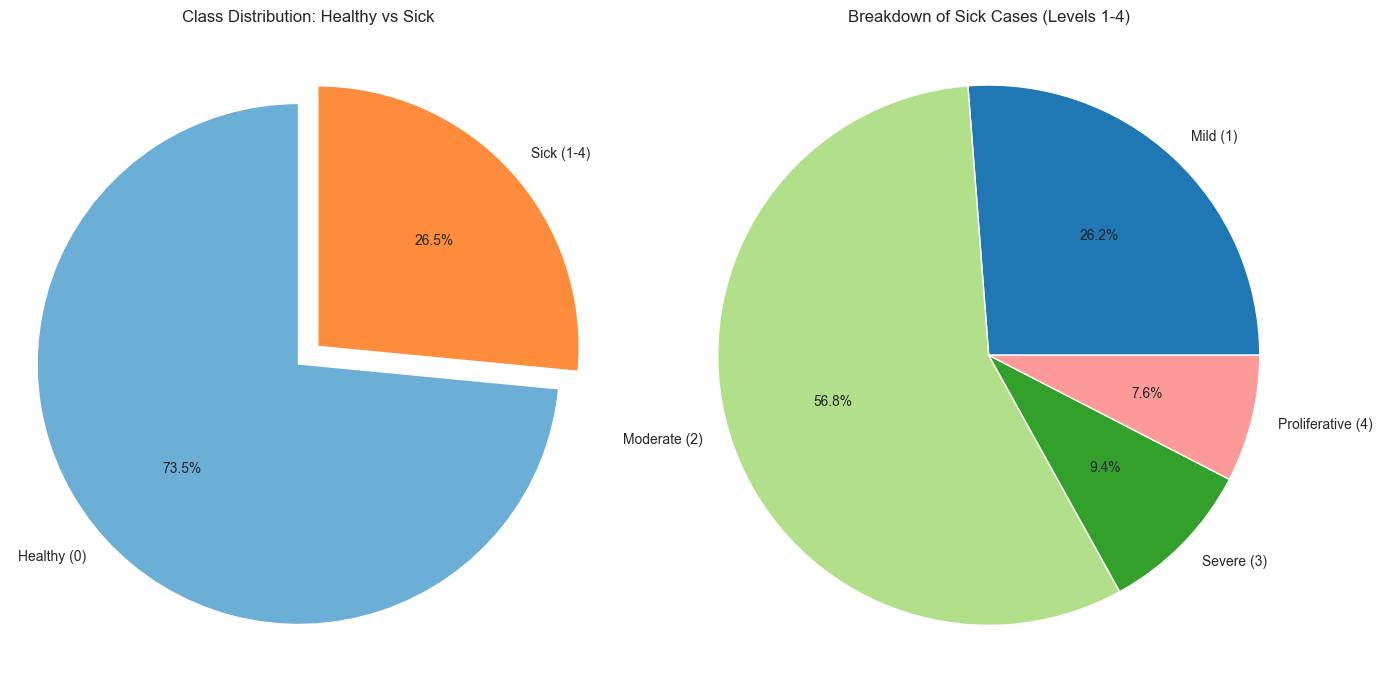

Count
Severity Level       
no DR           25810
Mild             2443
Moderate         5292
Severe            873
Proliferative     708

In [8]:
def plot_class_distribution(df):
    """
    Plots a 'Pie of a Pie' chart showing the distribution of 'level' classes,
    with a simplified main chart of healthy vs sick, and a breakdown of 'sick' cases (levels 1 to 4).

    Parameters:
        df (pd.DataFrame): DataFrame containing at least the 'level' column.
    """
    # Calculate healthy and sick counts
    healthy_count = df[df['level'] == 0].shape[0]
    sick_count = df[df['level'] > 0].shape[0]

    # Main Pie Chart Data: Healthy vs Sick
    sizes_main = [healthy_count, sick_count]
    labels_main = ['Healthy (0)', 'Sick (1-4)']
    colors_main = ['#6baed6', '#fd8d3c']  # Blue for Healthy, Orange for Sick
    explode_main = [0, 0.1]  # Slightly separate the "Sick" category

    # Sick Cases Pie Chart Data (Levels 1 to 4)
    sick_levels = [1, 2, 3, 4]
    sick_labels = ['Mild (1)', 'Moderate (2)', 'Severe (3)', 'Proliferative (4)']
    sick_sizes = [df[df['level'] == level].shape[0] for level in sick_levels]
    colors_sick = plt.cm.Paired(np.arange(1, len(sick_levels)+1))

    # Create figure and subplots
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 7))

    # Main Pie Chart: Healthy vs Sick
    ax1.pie(sizes_main,
            labels=labels_main,
            autopct='%1.1f%%',
            startangle=90,
            colors=colors_main,
            explode=explode_main,
            wedgeprops={'linewidth': 1, 'edgecolor': 'white'})
    ax1.set_title("Class Distribution: Healthy vs Sick")
    ax1.axis('equal')  # Ensures pie is circular

    # 'Sick' Cases Pie Chart: Levels 1 to 4
    ax2.pie(sick_sizes,
            labels=sick_labels,
            autopct='%1.1f%%',
            colors=colors_sick,
            wedgeprops={'linewidth': 1, 'edgecolor': 'white'})
    ax2.set_title("Breakdown of Sick Cases (Levels 1-4)")
    ax2.axis('equal')  # Ensures pie is circular
    plt.tight_layout()
    plt.show()

plot_class_distribution(df)

pd.DataFrame.from_dict(dict(Counter(df['level'])), orient='index', columns=['Count']).reindex([0, 1, 2, 3, 4]).rename(index={0: 'no DR', 1: 'Mild', 2: 'Moderate', 3: 'Severe', 4: 'Proliferative'}).rename_axis("Severity Level")

The pie chart clearly illustrates a significant class imbalance, both at the broader level (left) and within the "sick" category itself (right). Healthy samples dominate the dataset, comprising 73.5% of the total, leaving only 26.5% of the data categorized as sick. This stark disparity suggests that models trained on the dataset could be biased toward predicting the majority class (healthy), potentially overlooking critical cases of diabetic retinopathy (DR).

Within the sick category, the imbalance becomes even more pronounced. Moderate DR cases (level 2) make up the majority, accounting for 56.8% of the sick samples, while mild cases (level 1) contribute 26.2%. In stark contrast, the severe (level 3) and proliferative (level 4) cases, which are clinically more urgent, collectively represent 17% of the sick samples and only 4.5% $(17\% \times 26.5\% \times 100 = 4.5\%)$
 of the entire dataset. This highlights the need for advanced techniques, such as class rebalancing, data augmentation, and attention mechanisms, to ensure that the model can accurately detect and prioritize these severe cases despite their rarity. Without addressing this imbalance, the risk of misdiagnosing or missing critical cases could significantly undermine the model's clinical utility.

The exact count for each class can be seen in the table.

Next we will see several examples from each class.

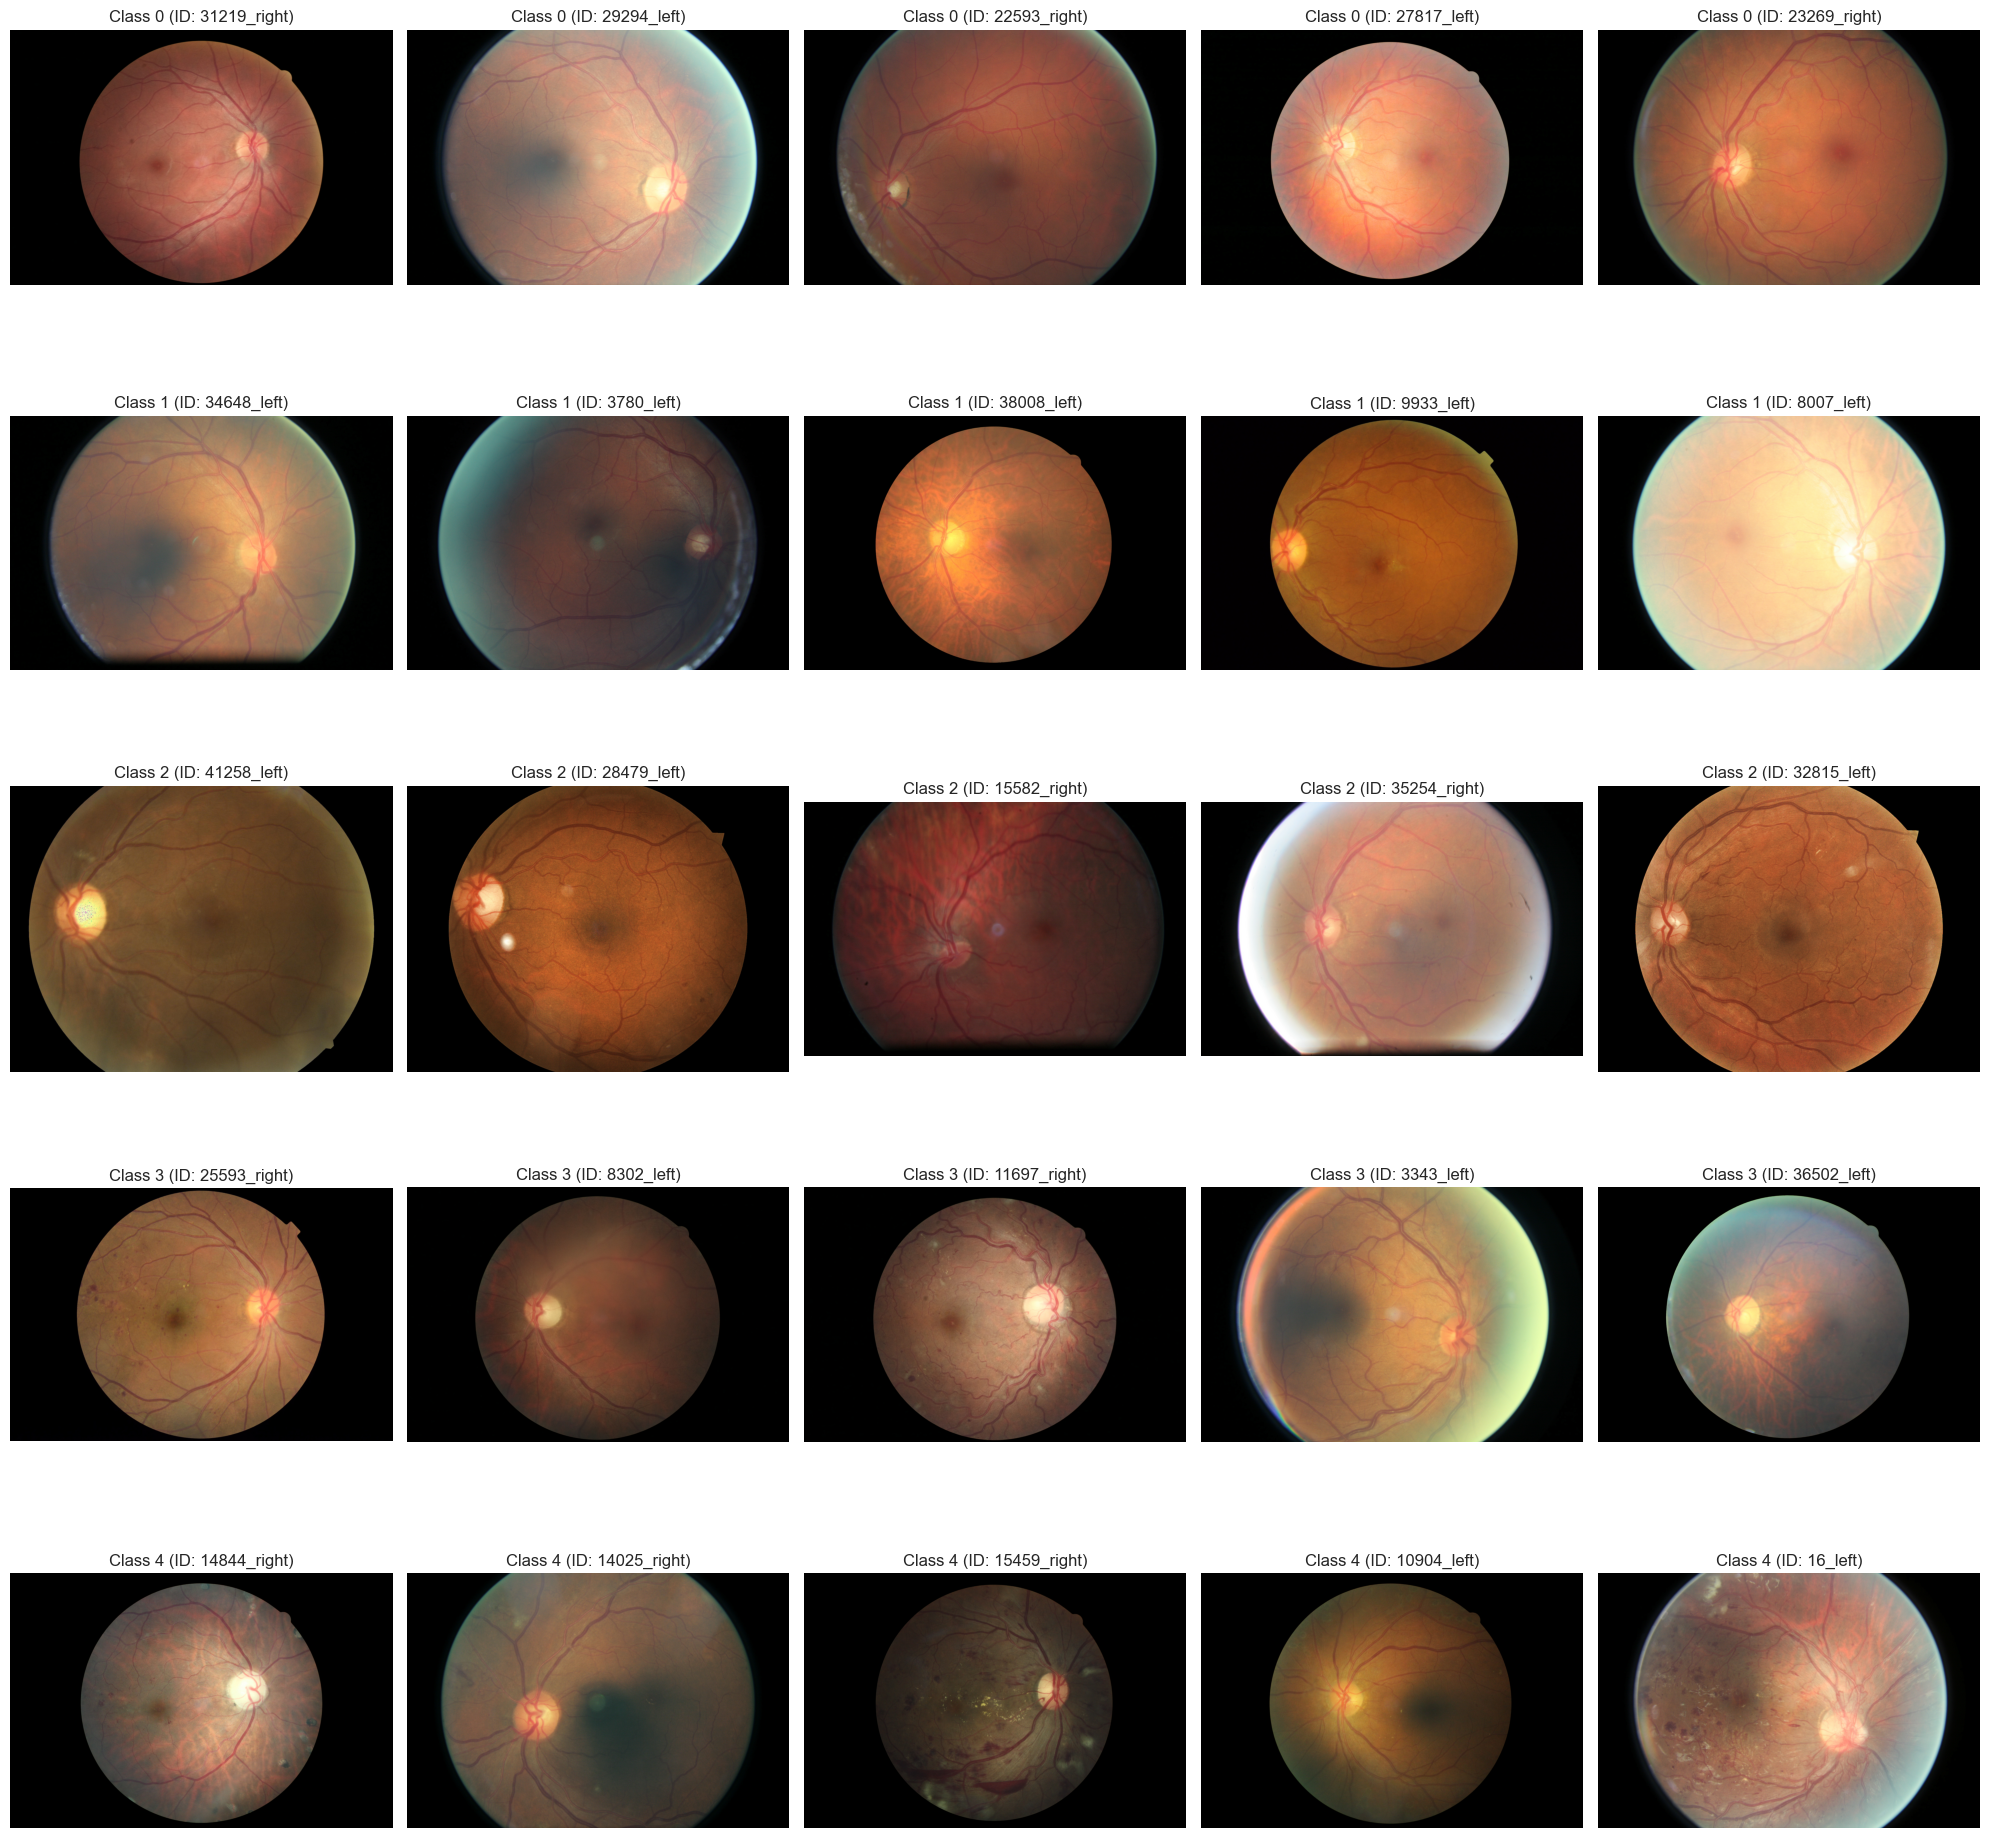

In [4]:
def show_examples_per_class(df, images_folder, num_examples=5):
    """
    Displays a few sample images from each class.

    Parameters:
        df (pd.DataFrame): Must have columns 'image' and 'level'
        images_folder (str): Path to where images are stored (each image named {image_id}.jpeg)
        num_examples (int): Number of examples to display per class
    """
    # Unique classes sorted for consistent ordering
    classes = sorted(df['level'].unique())

    # Figure setup: one row per class, `num_examples` columns
    fig, axes = plt.subplots(nrows=len(classes), ncols=num_examples, figsize=(4 * num_examples, 4 * len(classes)))
    if len(classes) == 1:
        axes = [axes]  # Ensure we can iterate if there's only one class

    for row_idx, cls in enumerate(classes):
        # Filter the dataframe for the current class
        df_cls = df[df['level'] == cls]

        # Randomly sample a few images (up to num_examples)
        sample_df = df_cls.sample(n=min(num_examples, len(df_cls)), random_state=random_state)

        for col_idx, (_, row) in enumerate(sample_df.iterrows()):
            image_id = row['image']
            img_path = os.path.join(images_folder, f"{image_id}.jpeg")

            # Read and convert to RGB for plotting
            bgr_img = cv2.imread(img_path)
            if bgr_img is not None:
                rgb_img = cv2.cvtColor(bgr_img, cv2.COLOR_BGR2RGB)
            else:
                # If image is not found or can't be read, create a placeholder
                rgb_img = None

            ax = axes[row_idx][col_idx] if len(classes) > 1 else axes[col_idx]
            ax.axis('off')

            if rgb_img is not None:
                ax.imshow(rgb_img)
                ax.set_title(f"Class {cls} (ID: {image_id})")
            else:
                ax.text(0.5, 0.5, "Image Not Found", ha='center', va='center')
                ax.set_title(f"Class {cls}\nMissing: {image_id}")

    plt.tight_layout()
    plt.show()

show_examples_per_class(df, images_path)

As can be seen from the examples, the severity of DR is highly distinguishable between classes, even for non-professionals. Some of the more visible differences include:
- **Class 0:** Appears to show healthy retinas with no or minimal abnormalities.
- **Class 1:** Subtle changes in vascularity or slight irregularities, such as mild microaneurysms.
- **Class 2:** More pronounced abnormalities, including early signs of hemorrhages or small areas of exudate, suggesting early disease progression.
- **Class 3:** Visible lesions, multiple hemorrhages, and exudates, indicating moderate disease severity.
- **Class 4:** Severe changes with significant abnormalities such as large hemorrhages, extensive exudates, and potential retinal detachment.

This progression highlights the importance of early detection and classification in preventing further complications and ensuring timely treatment.

Also noticeable in those examples is the variability in the sizes of the images, as well as the location and crop of the retina inside the images. Let's explore this further.

Processing images: 100%|██████████| 35126/35126 [06:01<00:00, 97.15images/s] 


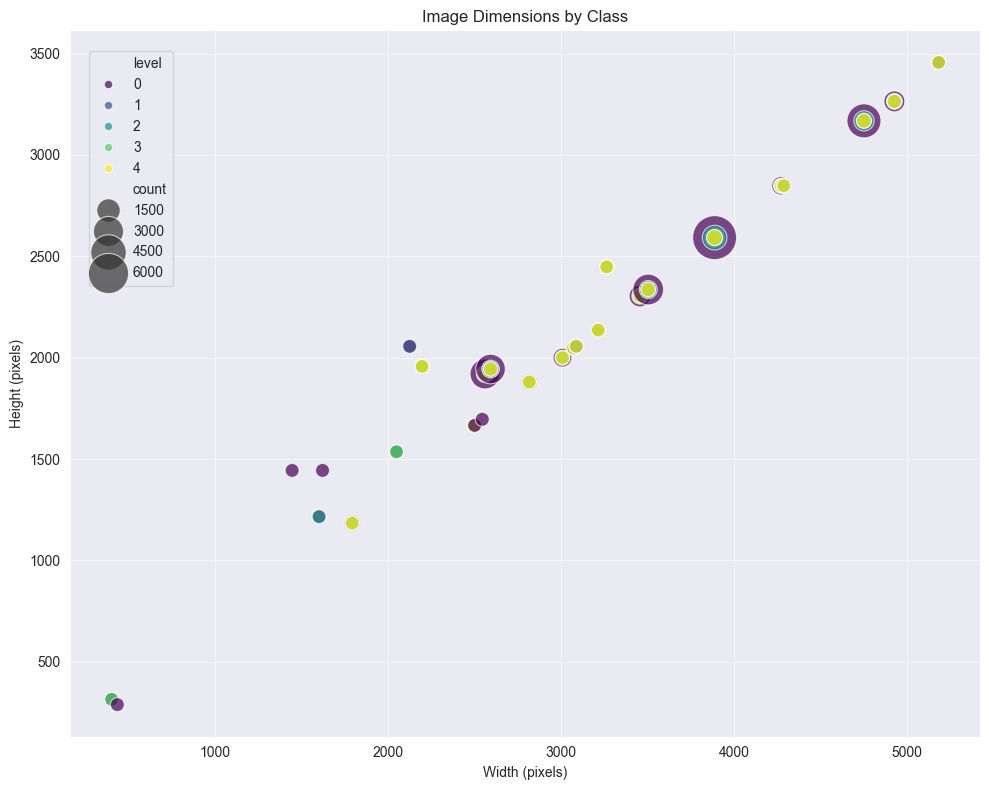

In [5]:
def plot_image_sizes(df, images_folder, max_workers=os.cpu_count() if os.cpu_count() else 4):
    """
    Plots a scatter chart with:
        - x-axis = image width
        - y-axis = image height
        - hue = class (level)
        - size = frequency of (width, height, class)

    Args:
        df: DataFrame containing 'image' and 'level' columns
        images_folder: Path to folder containing images
        max_workers: Maximum number of threads to use
    """

    def process_image(args):
        """
        Process a single image and return its dimensions and level.
        """
        image_id, level, images_folder = args
        img_path = os.path.join(images_folder, f"{image_id}.jpeg")

        try:
            bgr_img = cv2.imread(img_path)
            if bgr_img is not None:
                h, w, _ = bgr_img.shape
                return (w, h, level)
        except Exception as e:
            print(f"Error processing image {image_id}: {e}")
        return None

    # Prepare arguments for parallel processing
    args_list = [(row['image'], row['level'], images_folder)
                 for _, row in df.iterrows()]

    # Process images using ThreadPoolExecutor
    sizes = []
    with ThreadPoolExecutor(max_workers=max_workers) as executor:
        futures = [executor.submit(process_image, args) for args in args_list]

        # Show progress bar while processing
        for future in tqdm(futures, total=len(futures), desc="Processing images", unit="images"):
            result = future.result()
            if result is not None:
                sizes.append(result)

    # Convert to DataFrame
    sizes_df = pd.DataFrame(sizes, columns=['width', 'height', 'level'])

    # Count frequency of each (width, height, level) combination
    sizes_agg = sizes_df.groupby(['width', 'height', 'level']).size().reset_index(name='count')

    plt.figure(figsize=(10, 8))

# Scatter plot using Seaborn with larger dots
    scatter_plot = sns.scatterplot(data=sizes_agg,
                                   x='width',
                                   y='height',
                                   hue='level',
                                   size='count',
                                   sizes=(100, 1000),  # Increased dot size range
                                   palette='viridis',
                                   alpha=0.7)

    scatter_plot.set_title("Image Dimensions by Class")
    scatter_plot.set_xlabel("Width (pixels)")
    scatter_plot.set_ylabel("Height (pixels)")

    # Create legend with larger markers
    plt.legend(bbox_to_anchor=(0.12, 0.98),
              loc='upper right',
              prop={'size': 10})  # Increases the font size

    # Optional: Add grid
    plt.grid(True, alpha=0.6)

    plt.tight_layout()
    plt.show()

plot_image_sizes(df, images_path)

When analyzing the sizes of the images, we observe a significant variation in resolution. This wide range suggests that the dataset may originate from multiple sources or have been collected under different conditions. Such variability can present challenges in image preprocessing and model training, as inconsistent input sizes may impact performance and need to be addressed. Standardizing input dimensions through resizing or cropping may be necessary, though it is important to ensure that key features are preserved to avoid distortion or loss of critical details.

Most of the images have resolutions larger than 1500x1000 (width x height), with fewer than 1500 images falling below this size. This indicates that the dataset primarily consists of high-resolution data, which is advantageous for capturing fine details. Additionally, there is a noticeable cluster of images from various classes with dimensions approximately 3900x2600, suggesting a significant portion of the dataset is standardized at this resolution.


The following script analyzes retinal images and extracts geometric features such as the crop centers, bounding box, and circularity to provide insights into the shape and structure of the retina. Each retina image is converted to grayscale and thresholded to create a binary mask that isolates the retina from the background. Using contour detection, the largest contour is identified, assuming it corresponds to the retina. From this, the center of the retina is calculated and normalized relative to the image dimensions.

To better approximate the retina's shape, the script uses the *convex hull*. A convex hull is the smallest convex boundary that can encompass the contour, essentially "smoothing out" irregularities or noise in the shape. This is crucial because the raw contours often contain small indentations or fluctuations that can distort metrics like circularity or area ratios. By using the convex hull, the script provides a more robust and accurate representation of the retina's geometry, specifically addressing the common protrusion at the top corner of the retinal images. The use of the convex hull ensures that these distortions do not negatively impact the calculations, making it a key component of this analysis. An example of a convex hull can be seen below, where the blue outline represents the convex hull. It can be imagined as releasing a rubber band around a group of fixed points.

![Convex Hull example](ConvexHull.svg)

The script then calculates several key metrics:
- **bounding box:** The bounding box is the smallest rectangle that completely contains the retina's largest contour. This is later used to crop the images efficiently, ensuring focus on the retina itself.
- **Circularity:** Using the convex hull, circularity is refined to reflect how closely the retina shape resembles a perfect circle. The formula for circularity is:
  $$
  \text{Circularity} = \frac{4 \cdot \pi \cdot \text{Hull Area}}{\text{Hull Perimeter}^2}
  $$
  Circularity compares the area of the convex hull to its perimeter. The factor $4\pi$ accounts for the geometry of a perfect circle, where $Area = \pi r^2$ and $Perimeter=2\pi r$. For a circle, this formula simplifies to 1 because all other shapes, having a larger perimeter relative to their area, will have a lower value. Thus, the circularity metric is particularly sensitive to irregularities, and the convex hull ensures more reliable results by smoothing out noise or distortions in the contour.
- **center_y & center_x:** These represent the normalized coordinates of the retina's center, calculated using the moments of the largest contour. Normalization ensures that the center coordinates are expressed as fractions of the image's width and height, making them independent of the image's resolution.


To make the results more intuitive, the script visualizes the data in a scatter plot. This plot highlights the normalized crop centers of the retina, showing their spatial distribution across the image space. The circularity of each retina is represented using color intensity, providing an additional layer of information.

Processing images: 100%|██████████| 35126/35126 [08:47<00:00, 66.63images/s]


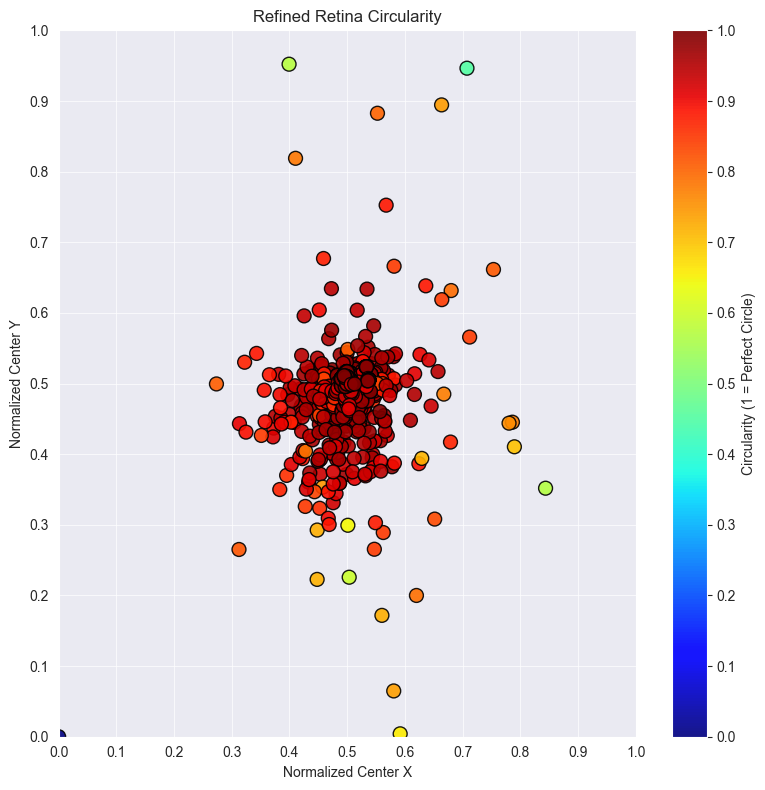

In [9]:
def analyze_retina_images(images_folder, df, max_workers=os.cpu_count() if os.cpu_count() else 4):
    """
    Analyzes retina images to calculate crop centers, circularity, and extent using multithreading.

    Parameters:
        images_folder (str): Path to the folder containing retina images.
        df (pd.DataFrame): A DataFrame with an 'image' column containing image names without extensions.
        max_workers (int): The maximum number of threads to use in the pool.
    """

    def process_image(image_name, images_folder):
        """
        Processes a single retina image to extract required metrics.

        Parameters:
            image_name (str): Name of the image without extension.
            images_folder (str): Path to the folder containing retina images.

        Returns:
            dict or None: A dictionary with extracted metrics or None if processing fails.
        """
        image_path = os.path.join(images_folder, f"{image_name}.jpeg")
        image = cv2.imread(image_path, cv2.IMREAD_COLOR)

        if image is None:
            # Image not found or cannot be read
            return None

        try:
            # Convert to grayscale and threshold to create a binary mask
            gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
            _, thresh = cv2.threshold(gray, 10, 255, cv2.THRESH_BINARY)

            # Detect contours and validate their presence
            contours, _ = cv2.findContours(thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
            if not contours:
                return None

            # Find the largest contour (assuming it's the retina)
            largest_contour = max(contours, key=cv2.contourArea)
            M = cv2.moments(largest_contour)

            # Calculate the center of the contour
            if M["m00"] != 0:
                cX = int(M["m10"] / M["m00"])
                cY = int(M["m01"] / M["m00"])
            else:
                cX, cY = 0, 0

            # Normalize center coordinates by image size
            height, width = image.shape[:2]
            normalized_cX = cX / width
            normalized_cY = cY / height

            # Calculate bounding box and extent
            x, y, w, h = cv2.boundingRect(largest_contour)

            # Convex Hull for a better approximation
            hull = cv2.convexHull(largest_contour)
            hull_area = cv2.contourArea(hull)
            hull_perimeter = cv2.arcLength(hull, True)

            # Refined Circularity using Convex Hull
            circularity = (4 * np.pi * hull_area) / (hull_perimeter ** 2) if hull_perimeter > 0 else 0

            # Return the result as a dictionary
            return {"image": image_name,
                    "center_x": normalized_cX,
                    "center_y": normalized_cY,
                    "bounding_box": (x, y, w, h),
                    "circularity": circularity}

        except Exception as e:
            # Handle any unexpected exceptions during processing
            print(f"Error processing image {image_name}: {e}")
            return None

    retina_info = []

    # Initialize ThreadPoolExecutor
    with ThreadPoolExecutor(max_workers=max_workers) as executor:
        # Submit all image processing tasks to the thread pool
        future_to_image = {executor.submit(process_image, row['image'], images_folder): row['image']
                           for _, row in df.iterrows()}

        # Use tqdm to display progress
        for future in tqdm(as_completed(future_to_image), total=len(future_to_image), desc="Processing images", unit="images"):
            result = future.result()
            if result is not None:
                retina_info.append(result)

    # Convert retina_info to a DataFrame
    retina_df_ = pd.DataFrame(retina_info)

    if retina_df_.empty:
        print("No valid retina information was extracted.")
        return

    # --- Create a Plot for Retina Circularity ---
    plt.figure(figsize=(8, 8))
    scatter = plt.scatter(retina_df_['center_x'], retina_df_['center_y'],
                          c = retina_df_['circularity'], cmap='jet',
                          s = 100, alpha=0.9, edgecolors='k')
    plt.title("Refined Retina Circularity")
    plt.xlabel("Normalized Center X")
    plt.ylabel("Normalized Center Y")
    plt.grid(True)
    plt.xlim(0, 1)
    plt.ylim(0, 1)
    plt.xticks(np.arange(0, 1.1, 0.1))
    plt.yticks(np.arange(0, 1.1, 0.1))
    plt.grid(True, alpha=0.7)
    cbar = plt.colorbar(scatter) # Add a color bar for circularity
    cbar.set_label("Circularity (1 = Perfect Circle)")
    cbar.set_ticks(np.arange(0, 1.1, 0.1))
    plt.tight_layout()
    plt.show()

    return retina_df_

retinal_df = analyze_retina_images(images_path, df)

From the scatter plot, it is evident that most retina centers are clustered near the normalized coordinates (0.5, 0.5). This indicates that the retinas are generally well-aligned and positioned close to the geometric center of the images. This consistency suggests a reliable image capture.

The plot also highlights the circularity of the retinas, with a significant proportion of points appearing in bright pink, which corresponds to circularity values close to 1. This indicates that most retinas in the dataset are near-perfect circles. There is, however, a noticeable spread of points with circularity values between 0.8 and 0.9. These slightly lower values could be attributed to minor deformations or cropping, likely at the top or bottom edges of the retina. A smaller number of points are visible in green and yellow, representing retinas with circularity below 0.7. These outliers may arise from various factors, including poor image quality, significant cropping that distorts the retina's shape, or genuine anatomical irregularities.

After exploring high-level structures and distributions of the dataset we can delve into pixel-level statistics such as brightness, channel information etc. First we'll focus on brightness and contrast of each class.

Analyzing Brightness & Contrast: 100%|██████████| 2560/2560 [03:15<00:00, 13.09images/s]


ModeResult(mode=np.float64(7.632242925367068), count=np.int64(1))
ModeResult(mode=np.float64(3.2449627375146064), count=np.int64(1))
ModeResult(mode=np.float64(6.6714308508611495), count=np.int64(1))
ModeResult(mode=np.float64(4.1242797956993344), count=np.int64(1))
ModeResult(mode=np.float64(6.46270091221559), count=np.int64(1))


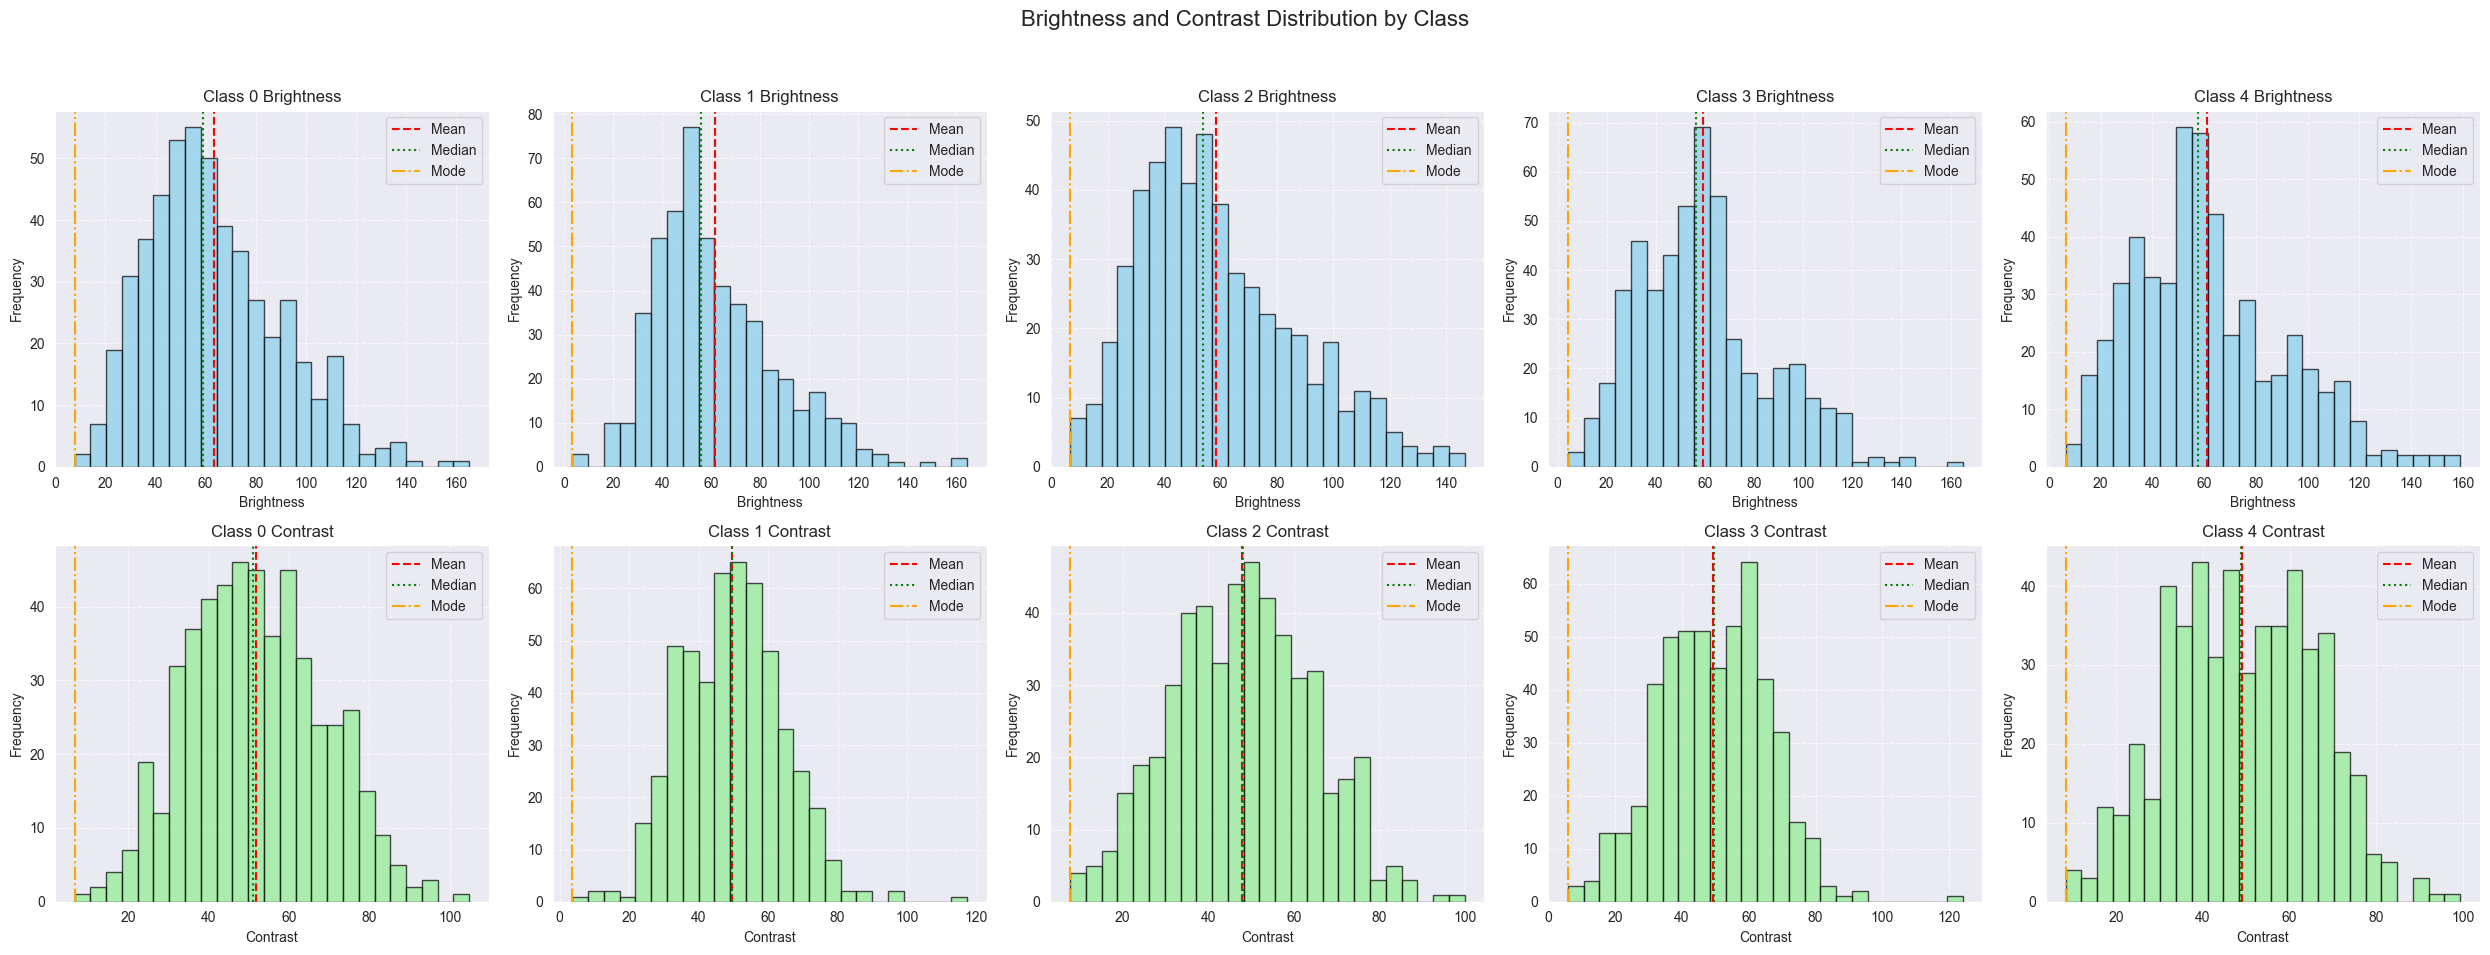

In [7]:
def analyze_brightness_contrast(df, images_folder, sample_size=512):
    """
    Analyze brightness and contrast of all images within the specified folder,
    regardless of their exposure categories.

    Parameters:
        df (pd.DataFrame): DataFrame containing at least the following columns:
            - 'image': Image filename without extension.
            - 'level': Integer class label (e.g., disease levels).
        images_folder (str): Path to the root folder containing all exposure categories as subdirectories.
        sample_size (int): Number of samples to analyze per class label.
        random_state (int): Seed for reproducibility in sampling.
    """

    # Initialize lists to store metrics
    brightness_list = []
    contrast_list = []
    label_list = []
    image_list = []

    # Sample data from each class label
    sampled_data = df.groupby("level", group_keys=False).apply(
        lambda x: x.sample(min(sample_size, len(x)), random_state=random_state),
        include_groups=True).reset_index(drop=True)

    # Iterate over sampled data
    for _, row in tqdm(sampled_data.iterrows(), total=len(sampled_data), desc="Analyzing Brightness & Contrast", unit="images"):
        image_path = os.path.join(images_folder, row['image'] + ".jpeg")

        # Check if the image exists
        if not os.path.exists(image_path):
            # print(f"Image not found: {image_path}")
            continue

        # Read the image in grayscale
        image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

        if image is None:
            # print(f"Failed to read: {image_path}")
            continue

        # Compute brightness and contrast
        brightness = np.mean(image)
        contrast = np.std(image)

        # Append metrics to the lists
        brightness_list.append(brightness)
        contrast_list.append(contrast)
        label_list.append(row['level'])
        image_list.append(row['image'])

    # Visualization: Brightness and Contrast Distribution by Class
    unique_labels = sorted(set(label_list))
    num_labels = len(unique_labels)

    # Determine subplot grid size based on the number of classes
    cols = min(5, num_labels)  # Maximum 5 columns
    rows = 2  # Fixed to 2 rows: one for brightness, one for contrast

    fig, axes = plt.subplots(rows, cols, figsize=(5 * cols, 10))
    fig.suptitle("Brightness and Contrast Distribution by Class", fontsize=16)

    # If there's only one column, axes may not be a 2D array
    if cols == 1:
        axes = np.expand_dims(axes, axis=1)

    for i, label in enumerate(unique_labels):
        # Select the appropriate subplot for brightness and contrast
        ax_brightness = axes[0, i]
        ax_contrast = axes[1, i]

        # Filter data for the current label
        brightness_data = [b for b, l in zip(brightness_list, label_list) if l == label]
        contrast_data = [c for c, l in zip(contrast_list, label_list) if l == label]

        # Plot Brightness Histogram
        ax_brightness.hist(brightness_data, bins=25, alpha=0.7, color='skyblue', edgecolor='black')
        ax_brightness.set_title(f"Class {label} Brightness")
        ax_brightness.set_xlabel("Brightness")
        ax_brightness.set_ylabel("Frequency")
        ax_brightness.grid(True, linestyle='--', alpha=0.7)

        # Calculate statistics for brightness
        mean_b = np.mean(brightness_data)
        median_b = np.median(brightness_data)
        mode_result_b = stats.mode(brightness_data)
        # Handle mode based on scipy version
        if np.isscalar(mode_result_b.mode):
            mode_b = mode_result_b.mode if mode_result_b.count > 0 else mean_b
        else:
            mode_b = mode_result_b.mode[0] if mode_result_b.count[0] > 0 else mean_b

        # Plot vertical lines for brightness
        ax_brightness.axvline(mean_b, color='red', linestyle='dashed', linewidth=1.5, label='Mean')
        ax_brightness.axvline(median_b, color='green', linestyle='dotted', linewidth=1.5, label='Median')
        ax_brightness.axvline(mode_b, color='orange', linestyle='dashdot', linewidth=1.5, label='Mode')

        # Add legend to brightness subplot
        ax_brightness.legend()

        # Plot Contrast Histogram
        ax_contrast.hist(contrast_data, bins=25, alpha=0.7, color='lightgreen', edgecolor='black')
        ax_contrast.set_title(f"Class {label} Contrast")
        ax_contrast.set_xlabel("Contrast")
        ax_contrast.set_ylabel("Frequency")
        ax_contrast.grid(True, linestyle='--', alpha=0.7)

        # Calculate statistics for contrast
        mean_c = np.mean(contrast_data)
        median_c = np.median(contrast_data)
        mode_result_c = stats.mode(contrast_data)

        # Handle mode based on scipy version
        if np.isscalar(mode_result_c.mode):
            mode_c = mode_result_c.mode if mode_result_c.count > 0 else mean_c
        else:
            mode_c = mode_result_c.mode[0] if mode_result_c.count[0] > 0 else mean_c

        # Plot vertical lines for contrast
        ax_contrast.axvline(mean_c, color='red', linestyle='dashed', linewidth=1.5, label='Mean')
        ax_contrast.axvline(median_c, color='green', linestyle='dotted', linewidth=1.5, label='Median')
        ax_contrast.axvline(mode_c, color='orange', linestyle='dashdot', linewidth=1.5, label='Mode')

        # Add legend to contrast subplot
        ax_contrast.legend()

    # Hide any unused subplots
    for j in range(i + 1, cols):
        ax_brightness = axes[0, j]
        ax_contrast = axes[1, j]
        ax_brightness.axis('off')
        ax_contrast.axis('off')

    plt.tight_layout(rect=[0, 0.03, 1, 0.95])
    plt.show()

analyze_brightness_contrast(df, images_path)

Looking at the brightness levels (top row), we observe a right-skewed distribution across all classes, as indicated by the relationship Mean > Median > Mode. This suggests that most images in the dataset have relatively low brightness, making them appear darker overall. However, a small number of images are significantly brighter, extending the right tail of the distribution and pulling the mean brightness upward. While the dataset predominantly consists of darker images, the presence of these much brighter outliers introduces variability in brightness levels. This suggests that some images may be outliers, either due to inconsistencies in lighting conditions or variations in image acquisition.

In contrast, the histograms for contrast (bottom row) are roughly bell-shaped, indicating a normal distribution across classes. The mean and median are very close in value, reinforcing the symmetry of the distribution and confirming that contrast levels do not exhibit significant skewness. This suggests that contrast is more consistent across classes compared to brightness, reducing the likelihood of extreme variations in contrast levels between different groups.

One important observation is that the mode is very low for both brightness and contrast, meaning that a large number of images have very low brightness and weak contrast. This suggests that most images appear darker and less distinct, even though the mean brightness and contrast values might seem reasonable at first glance. A likely explanation is the presence of large black boundaries surrounding the retina, which contribute to the low mode values. Removing some of these boundaries and focusing more on the retina itself might help enhance image quality and improve downstream analysis.

Now lets turn our attention to colors.

100%|██████████| 35126/35126 [42:29<00:00, 13.78it/s] 



=== Per-Class Channel Summary (Mean of Means) ===
   label     mean_b     mean_g     mean_r      std_b      std_g      std_r
0      0  41.768302  57.767846  82.650668  34.168909  47.073296  67.427921
1      1  38.614240  55.617664  80.404632  31.944947  45.605512  65.699803
2      2  39.505579  55.961958  78.818900  32.312335  46.052400  65.463255
3      3  37.114986  54.053999  77.209839  30.824373  45.200683  65.295214
4      4  40.080958  56.436962  77.227659  32.020460  45.398572  62.769368


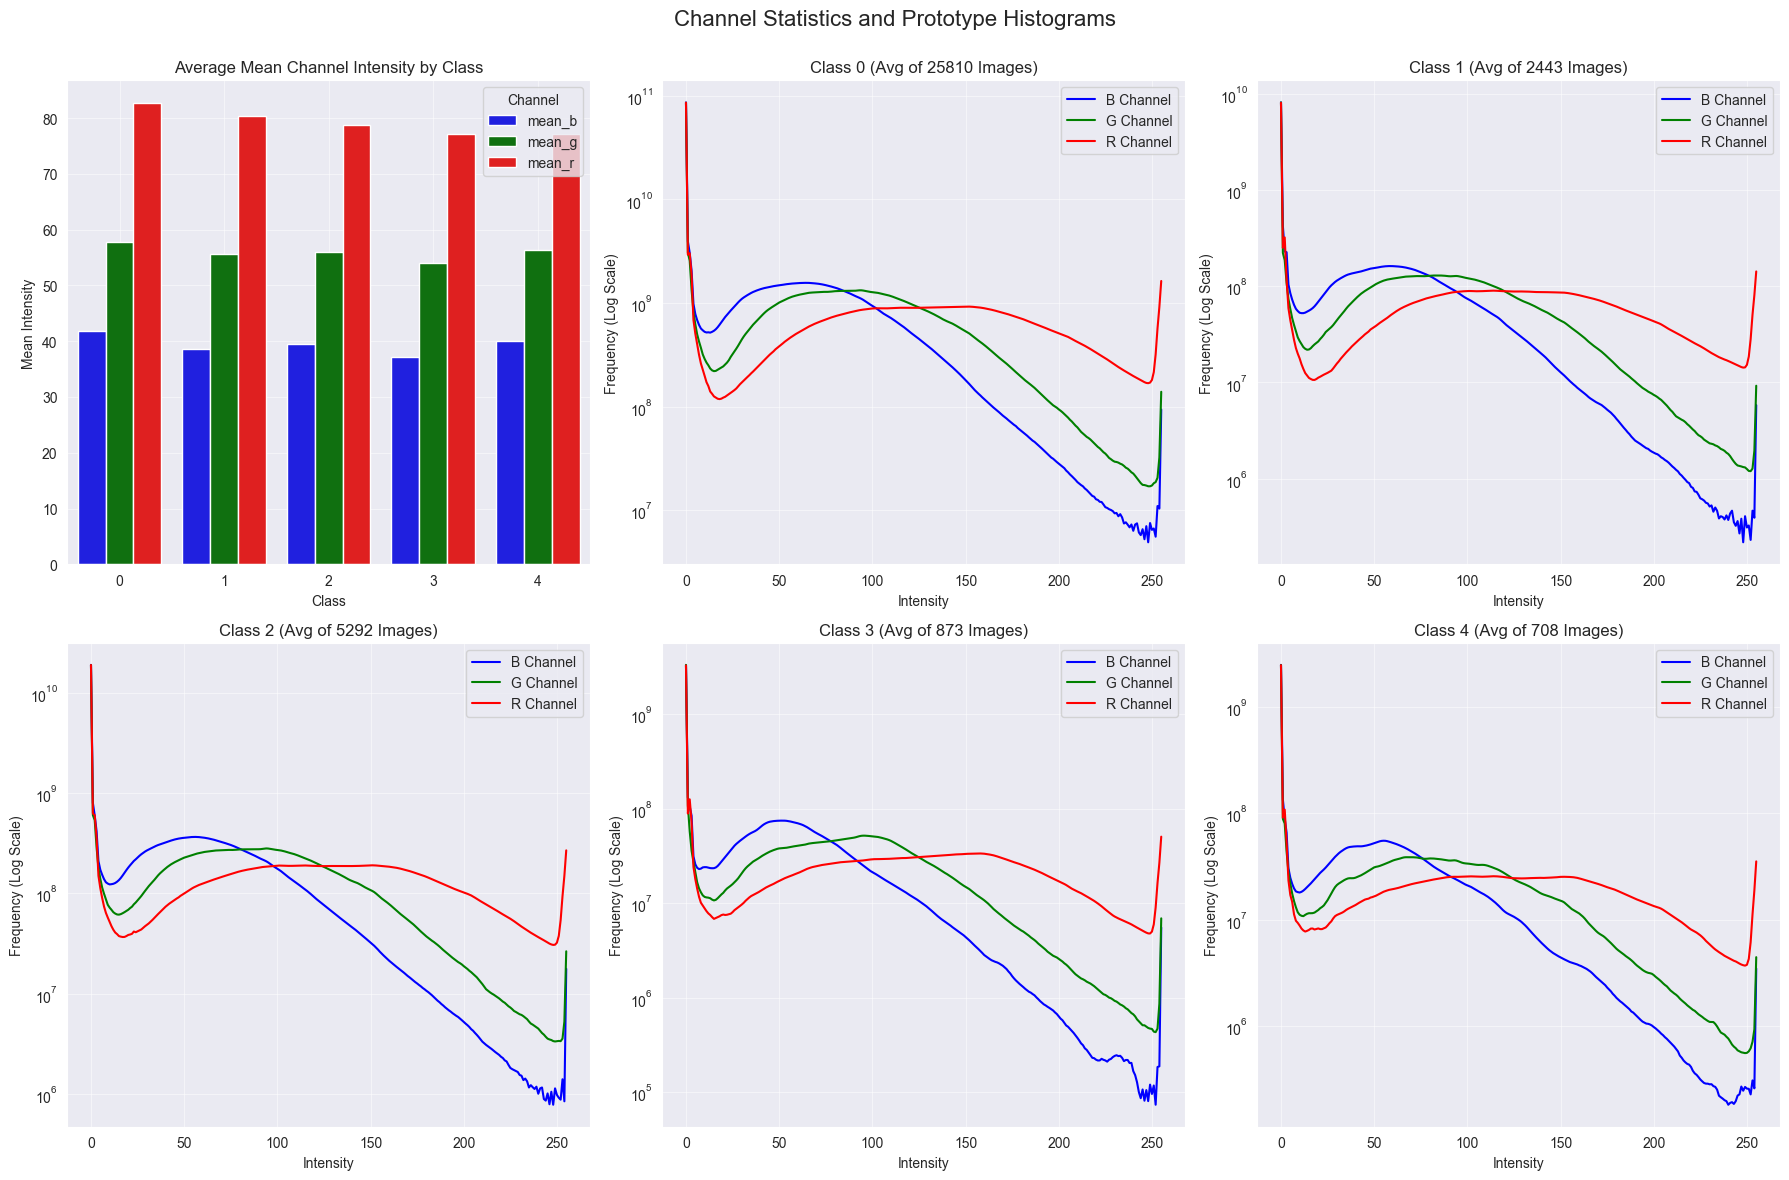

In [48]:
def analyze_global_pixel_intensity(df, images_folder, bins=256, max_workers=os.cpu_count() if os.cpu_count() else 4):
    """
    Analyzes global pixel intensity, plots prototype histograms for each class, and summarizes channel statistics.

    Parameters
    ----------
    df : pd.DataFrame
        DataFrame with two columns: 'image' (image filename without extension) and 'level' (class label).
    images_folder : str
        Path to the folder containing {image}.jpeg files.
    bins : int, optional
        Number of bins in the stored histogram.
    max_workers : int, optional
        Maximum number of threads to use for parallel processing.
    """

    def compute_image_stats(args):
        """Helper function to compute statistics for a single image"""
        image_path, image_name, level = args
        img_bgr = cv2.imread(image_path)

        if img_bgr is None:
            return None

        # Split channels in BGR order
        b_channel, g_channel, r_channel = cv2.split(img_bgr)

        # Compute mean and std per channel
        stats = {
            'label': level,
            'image': image_name,
            'mean_b': b_channel.mean(),
            'std_b': b_channel.std(),
            'mean_g': g_channel.mean(),
            'std_g': g_channel.std(),
            'mean_r': r_channel.mean(),
            'std_r': r_channel.std()
        }

        # Compute RGB histogram
        hist_b = cv2.calcHist([img_bgr], [0], None, [256], [0, 256]).ravel()
        hist_g = cv2.calcHist([img_bgr], [1], None, [256], [0, 256]).ravel()
        hist_r = cv2.calcHist([img_bgr], [2], None, [256], [0, 256]).ravel()

        stats['rgb_hist'] = {'b': hist_b, 'g': hist_g, 'r': hist_r}

        return stats

    # Prepare arguments for parallel processing
    process_args = [(os.path.join(images_folder, f"{row['image']}.jpeg"), row['image'], row['level'])
                    for _, row in df.iterrows()]

    # Initialize containers
    stats_records = []
    prototype_hist = {cl: {'b': np.zeros(bins), 'g': np.zeros(bins), 'r': np.zeros(bins), 'count': 0}
                      for cl in sorted(df['level'].unique())}

    # Compute statistics in parallel
    with ThreadPoolExecutor(max_workers=max_workers) as executor:
        futures = [executor.submit(compute_image_stats, args) for args in process_args]

        for future in tqdm(as_completed(futures), total=len(futures)):
            result = future.result()
            if result is not None:
                stats_records.append({k: v for k, v in result.items() if k != 'rgb_hist'})

                # Update prototype histograms
                cl = result['label']
                rgb_hist = result['rgb_hist']
                for channel in ['b', 'g', 'r']:
                    prototype_hist[cl][channel] += rgb_hist[channel]
                prototype_hist[cl]['count'] += 1

    # Create statistics DataFrame
    stats_df = pd.DataFrame(stats_records)

    # Aggregate by class
    channel_summary = stats_df.groupby('label').agg({'mean_b': 'mean', 'mean_g': 'mean', 'mean_r': 'mean',
                                                     'std_b': 'mean', 'std_g': 'mean', 'std_r': 'mean'}).reset_index()

    print("\n=== Per-Class Channel Summary (Mean of Means) ===")
    print(channel_summary)

    # Plot in a single figure with 2 rows and 3 columns
    fig, axes = plt.subplots(2, 3, figsize=(18, 12))
    axes = axes.flatten()

    # Define color mappings for channels
    channel_palette = {'mean_b': 'blue',
                       'mean_g': 'green',
                       'mean_r': 'red'}

    channel_colors = {'b': 'blue',
                      'g': 'green',
                      'r': 'red'}

    # Plot 1: Bar plot of channel means
    wide_df = channel_summary.melt(
        id_vars=['label'],
        value_vars=['mean_b', 'mean_g', 'mean_r'],
        var_name='channel_stat',
        value_name='value'
    )

    # Bar Plot
    sns.barplot(
        x='label',
        y='value',
        hue='channel_stat',
        data=wide_df,
        ax=axes[0],
        palette=channel_palette  # Apply the custom palette
    )
    axes[0].set_title("Average Mean Channel Intensity by Class")
    axes[0].set_xlabel("Class")
    axes[0].set_ylabel("Mean Intensity")
    axes[0].legend(title="Channel")
    axes[0].grid(alpha=0.5)

    # Plot 2-6: Class prototype histograms
    unique_classes = sorted(df['level'].unique())
    for idx, cl in enumerate(unique_classes):
        if idx + 1 >= len(axes):  # Skip if there are more classes than available subplots
            break

        count = prototype_hist[cl]['count']
        if count == 0:
            axes[idx + 1].axis('off')
            continue

        ax = axes[idx + 1]
        for channel in ['b', 'g', 'r']:
            avg_hist = prototype_hist[cl][channel]
            ax.plot(range(bins),
                    avg_hist,
                    label=f"{channel.upper()} Channel",
                    color=channel_colors[channel])  # Assign the correct color

        ax.set_title(f"Class {cl} (Avg of {count} Images)")
        ax.set_xlabel("Intensity")
        ax.set_ylabel("Frequency (Log Scale)")
        ax.set_yscale("log")  # Apply log scale
        ax.legend()
        ax.grid(alpha=0.5)

    # Hide unused subplots if there are fewer classes than grid cells
    for idx in range(len(unique_classes) + 1, len(axes)):
        axes[idx].axis('off')

    plt.tight_layout(rect=[0, 0, 1, 0.95])
    fig.suptitle("Channel Statistics and Prototype Histograms", fontsize=16)
    plt.show()

analyze_global_pixel_intensity(df, images_path)

Looking at the graphs, we can arrive at several interesting insights. First, let us examine the Average Mean Channel Intensity bar plot, which summarizes the average intensity of each color across the entire class. We can see that there is not much difference between classes, meaning the overall color distribution remains relatively consistent across different categories. However, when examining color channel intensity, we see a significant difference between colors. The Red Channel (mean_r) consistently exhibits the highest mean intensity across all classes, suggesting that the images have a reddish tint, which is common in retinal imaging due to the natural coloration of blood vessels and retinal tissue. The Blue and Green channels are less pronounced, aligning with the expected biological characteristics of the retina. Given this strong red dominance, applying color normalization or equalization could help enhance features in the Blue and Green channels, potentially improving the visibility of non-red structures.

The summary table provides more precise statistics, revealing that the standard deviations (std) are highest for the red channel, indicating greater variability in red intensity across images. This variability might reflect differences in the stage of Diabetic Retinopathy (DR) since one common characteristic of advanced DR is the presence of hemorrhages, microaneurysms and abnormal blood vessels growth, which result in localized increases in red intensity due to blood accumulation. The variations in red intensity across images might therefore be indicative of the severity of vascular damage in different patients. Those are illustrated in the drawing below.

![Retina example](Retina.png)

Turning to the Per-Class Channel Distributions (Line Plots), we once again observe that the blue channel is significantly less dominant, with its intensity tapering off rapidly at higher intensity levels. This suggests that blue contributes the least to retinal image composition, reinforcing the idea that retinal structures and blood vessels are primarily composed of warmer colors (reds and greens). Interestingly, the green channel exhibits a more stable presence across most intensities, meaning that green is more uniformly distributed across different pixel intensities. This could indicate that green plays a key role in defining the structural features of the retina, possibly representing connective tissue, background regions, or areas with reduced vascularization.

The red channel, which we initially expected to dominate at stronger intensities based on the bar plot, does not fully match this expectation. Although stronger than blue, its intensity drops sharply at mid-range levels and tapers off significantly at higher intensities. This suggests that while red is prominent, it does not dominate the highest intensity regions, possibly because strong highlights and reflections in retinal images tend to be more neutral or white, rather than purely red. Additionally, this drop could indicate that while blood vessels and hemorrhages contribute to red intensity, they are not the sole determinant of bright regions in the images.

The strong peaks around 0 and 250+ may be indicative of outliers in the dataset. The peak near 0 suggests the presence of a significant number of very dark pixels, which could be due to the black background surrounding the retina or shadowed regions in the images. On the other hand, the peak at the highest intensity (250+) suggests that some pixels are fully saturated, which may be caused by bright highlights, reflections, or overexposed regions in certain images.

Since we have already identified signs of outliers twice, we should consider looking for a third indicator by examining exposure

Processing Images: 100%|██████████| 35126/35126 [02:57<00:00, 197.56images/s]


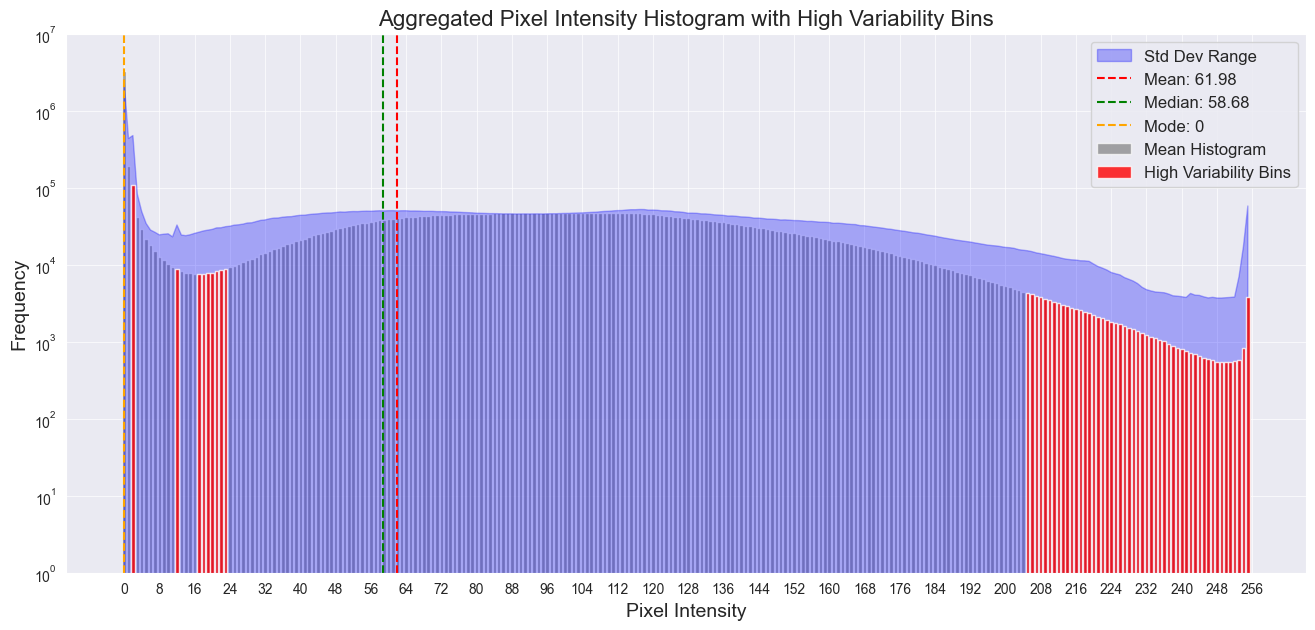

In [47]:
def process_images(df, images_folder, max_workers=os.cpu_count() if os.cpu_count() else 4):
    """
    Processes images to compute their histograms and plots the aggregated histogram.

    Parameters:
        df (pd.DataFrame): DataFrame containing 'image' and 'level' columns.
        images_folder (str): Path to the folder containing images.
        output_size (tuple): Target size for image resizing.
        max_workers (int): Number of threads for parallel processing.

    Returns:
        pd.DataFrame: DataFrame with 'image', 'level', and 'histogram' columns.
    """

    def process_single_row(row):
        """
        Processes a single image to compute its histogram.

        Parameters:
            row (pd.Series): Row containing 'image' and 'level'.

        Returns:
            dict: Dictionary with 'image', 'level', and 'histogram' or error info.
        """
        image_name = row["image"]
        label = row["level"]
        image_path = os.path.join(images_folder, f"{image_name}.jpeg")

        result = {"image": image_name,
                  "level": label,
                  "histogram": None}

        if not os.path.isfile(image_path):
            return result # Image not found

        try:
            # Load the image in grayscale
            gray_image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

            if gray_image is None:
                return result # Failed to read image

            # Compute histogram using OpenCV's calcHist for efficiency
            hist = cv2.calcHist([gray_image], [0], None, [256], [0, 256]).flatten()
            hist_list = hist.tolist()

            result["histogram"] = hist_list

            return result

        except Exception as e:
            print(f"Error processing {image_name}: {e}")
            return result

    all_results = []
    all_hists = []

    # Process images in parallel using executor.map
    with ThreadPoolExecutor(max_workers=max_workers) as executor:
        rows = [row for _, row in df.iterrows()]
        results = list(tqdm(executor.map(process_single_row, rows), total=len(rows), desc="Processing Images", unit="images"))

    for res in results:
        all_results.append(res)
        if res["histogram"] is not None:
            all_hists.append(res["histogram"])

    results_df = pd.DataFrame(all_results)

    # Convert histograms to numpy arrays
    if all_hists:
        valid_hists = np.array(all_hists, dtype=float)
        aggregated_histogram = np.mean(valid_hists, axis=0)
        std_histogram = np.std(valid_hists, axis=0)
    else:
        aggregated_histogram = None
        std_histogram = None

    # Identify bins with high variability (e.g., where std > 3.5 * mean for that bin)
    high_variability_bins = np.where(std_histogram > 3.5 * aggregated_histogram)[0]

    # Plot the aggregated histogram with ±std and highlight high variability bins
    if aggregated_histogram is not None and std_histogram is not None:
        intensities = np.arange(256)

        total_pixels = np.sum(aggregated_histogram)
        mean_val = np.sum(aggregated_histogram * intensities) / total_pixels
        cdf = np.cumsum(aggregated_histogram) / total_pixels
        median_val = np.interp(0.5, cdf, intensities)
        mode_val = intensities[np.argmax(aggregated_histogram)]

        max_val = np.max(aggregated_histogram + std_histogram)
        symmetric_limit = 10 ** np.ceil(np.log10(max_val)) if max_val > 0 else 1

        plt.figure(figsize=(16, 7))

        # Plot the mean histogram as bars
        plt.bar(intensities, aggregated_histogram, color="gray", alpha=0.7, label="Mean Histogram")

        # Plot ±std as a shaded region
        plt.fill_between(intensities,-std_histogram,std_histogram,
                         color="blue", alpha=0.3, label="Std Dev Range")

        # Highlight bins with high variability
        plt.bar(intensities[high_variability_bins],
                aggregated_histogram[high_variability_bins],
                color="red",
                alpha=0.8,
                label="High Variability Bins")

        # Add vertical lines for key statistics
        plt.axvline(mean_val, color="red", linestyle="--", linewidth=1.5, label=f"Mean: {mean_val:.2f}")
        plt.axvline(median_val, color="green", linestyle="--", linewidth=1.5, label=f"Median: {median_val:.2f}")
        plt.axvline(mode_val, color="orange", linestyle="--", linewidth=1.5, label=f"Mode: {mode_val:.0f}")

        # Plot settings
        plt.title("Aggregated Pixel Intensity Histogram with High Variability Bins (Log scale)", fontsize=16)
        plt.xlabel("Pixel Intensity", fontsize=14)
        plt.ylabel("Frequency", fontsize=14)
        plt.legend(fontsize=12)
        plt.grid(alpha=0.8)
        plt.xticks(ticks=np.arange(0, 256 + 8, 8))  # Ticks from 0 to 256 with a step of 8
        plt.yscale("log")  # Symmetric log scale with a linear threshold at ±1
        plt.ylim(1, symmetric_limit)  # Ensure symmetric y-axis limits
        plt.show()
    else:
        print("No histograms were computed to plot.")

    return results_df

histograms_df = process_images(df, images_path)

From the histogram of pixel intensity in grayscale, we observe that it is slightly right-skewed, indicating a higher frequency of pixels with lower intensity values compared to higher intensities. Additionally, there are notable increase in frequancy near the edges of the histogram, specifically beyond intensity levels 248 and higher and around 16 and lower. These increases correspond to a sharp increase in pixel counts at these intensity levels. It is important to note that the histogram is plotted on a logarithmic scale, meaning even small increases at these levels represent a significant change when viewed on a linear scale.

Another notable observation is the presence of high-variability bins, highlighted in red on the histogram. These are bins where the condition $std_{bin}>3.5\times mean_{bin}$ is satisfied, indicating substantial fluctuations in pixel intensity frequency across the dataset. This variability strongly suggests the presence of outliers. However, it is worth noting that these high-variability bins are not continuous, which may be attributed to the large number of black pixels present in the images.

This brings the total number of identified indicators of outliers to three, further reinforcing the conclusion that there are indeed outliers in the dataset. To gain deeper insights into these outliers, we will proceed with methods such as Principal Component Analysis (PCA) or clustering algorithms, which will be the next step in our analysis.

In [ ]:
#TODO: complete EDA

# **Pre-Processing**

---

As observed in the EDA, several key aspects must be addressed to optimize the prediction results. One of the primary concerns is the size distribution of the images and the position of the retina within them. To ensure consistency, we need to crop the images to a standardized size that effectively encompasses the retina while minimizing unnecessary background regions.

Given that the retina is predominantly circular, as noted earlier, the most logical approach is to crop the images into a square format. This ensures uniformity across the dataset while preserving the essential features of the retina. To determine the optimal cropping dimensions, we will analyze different size variations using the previously defined retina_df dataset.

An important factor to consider is the circularity index, which quantifies how closely the retina shape approximates a perfect circle. While many images exhibit a high circularity index, indicating a well-defined round structure, some have a lower value, suggesting more irregular shapes. This variation could impact the cropping process, as we need to ensure that no essential details are lost and that no distortions are introduced in the final images.

To address these challenges, we will explore different cropping strategies, taking into account both size consistency and retina positioning, while ensuring that the preprocessing steps preserve the integrity of the retinal structure. Let's examine some potential cropping approaches to achieve the best balance between standardization and minimal image distortion.

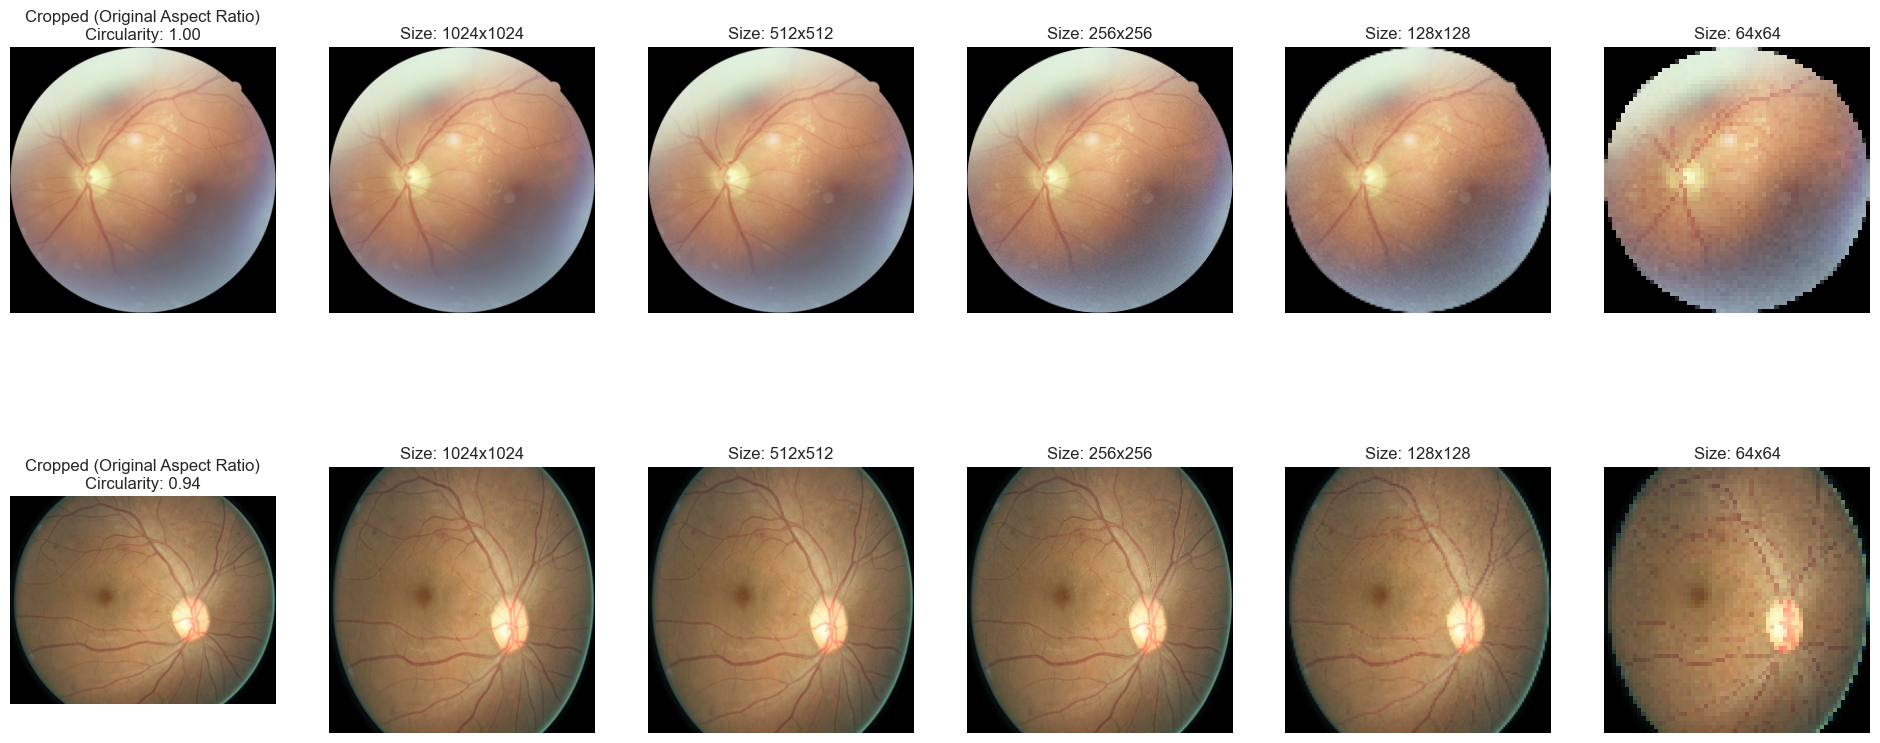

In [32]:
def process_and_plot_images(retinal_df, images_path, sizes=[1024, 512, 256, 128, 64]):
    def crop_and_resize(image, crop_box, desired_size=None):
        x, y, w, h = crop_box
        h_img, w_img = image.shape[:2]
        cropped_image = image[y:y+h, x:x+w]
        return cv2.resize(cropped_image, (desired_size, desired_size), interpolation=cv2.INTER_LINEAR) if desired_size else cropped_image

    # Select images with highest and ~0.94 circularity
    highest_circularity_row = retinal_df.loc[retinal_df['circularity'].idxmax()]
    approx_circularity_row = retinal_df.iloc[(retinal_df['circularity'] - 0.94).abs().idxmin()]

    image_rows = [highest_circularity_row, approx_circularity_row]
    image_paths = [os.path.join(images_path, f"{row['image']}.jpeg") for row in image_rows]
    crop_boxes = [row['bounding_box'] for row in image_rows]
    circularity_scores = [row['circularity'] for row in image_rows]
    images = [cv2.cvtColor(cv2.imread(img_path), cv2.COLOR_BGR2RGB) for img_path in image_paths]

    # Plot images
    fig, axes = plt.subplots(2, len(sizes) + 1, figsize=(24, 10))
    for row_idx, (image, crop_box, circularity) in enumerate(zip(images, crop_boxes, circularity_scores)):
        axes[row_idx, 0].imshow(crop_and_resize(image, crop_box))
        axes[row_idx, 0].set_title(f"Cropped (Original Aspect Ratio)\nCircularity: {circularity:.2f}")
        axes[row_idx, 0].axis("off")

        for col_idx, size in enumerate(sizes):
            resized_img = crop_and_resize(image, crop_box, size)
            axes[row_idx, col_idx + 1].imshow(resized_img)
            axes[row_idx, col_idx + 1].set_title(f"Size: {size}x{size}")
            axes[row_idx, col_idx + 1].axis("off")

    plt.show()

process_and_plot_images(retinal_df, images_path)

This image demonstrates the impact of resizing retinal fundus images to various dimensions, ranging from 1024×1024 to 64×64. The cropping approach maintains the original aspect ratio in the first image, ensuring that the retina remains centered and undistorted.

The first set of images has a circularity of 1.00, while the second set shows a slight decrease to 0.94, suggesting minor deviations from a perfect circular shape. When resizing the image to a square format, distortions in the shape of the retina become apparent. This suggests that an adaptive cropping strategy may be necessary to ensure that important regions of the retina are not distorted in images with lower circularity values.

The effects of downscaling are evident across different resolutions. Higher-resolution images (1024×1024, 512×512, 256×256) retain essential retinal details, including blood vessels, the optic disc, and macular features. However, as the resolution decreases to 128×128 and 64×64, the images become increasingly pixelated and blurry, leading to a loss of fine-grained details crucial for clinical analysis. While the overall structure of the retina remains recognizable, the ability to discern important pathological features, such as microaneurysms or small hemorrhages, is significantly reduced.

Given that the retina is predominantly circular, cropping the images into a square format is a logical choice, as it standardizes input dimensions for machine learning models. The black background surrounding the retina is minimized, ensuring that the relevant region occupies most of the image. However, careful consideration should be given to preserving key structures during resizing, particularly in images with lower circularity.

These findings suggest that while square cropping is an effective approach, circularity variations should be considered to avoid unintentional distortions or loss of retinal regions. Furthermore, resolutions below 128×128 are unlikely to be suitable for detailed retinal analysis, with 256×256 or 512×512 offering a more balanced choice for retaining both efficiency and diagnostic information.

based on those results, I'll choose to crop the image a moderate resolution of 512×512, also I'll incorporate an adaptive square cropping technique.

In [ ]:
def adaptive_square_cropping(df, images_folder, output_size=(512, 512), padding_color=(0, 0, 0)):
    """
    Perform adaptive square cropping on retinal images while maintaining aspect ratio by adding padding.

    Parameters:
        df (pd.DataFrame): DataFrame with 'image' (image names) and 'bounding_box' (tuple of (x, y, w, h)).
        images_folder (str): Path to the folder containing the images.
        output_size (tuple): Target size for resizing after cropping (default is 512x512).
        padding_color (tuple): RGB color for padding (default is black: (0, 0, 0)).

    Returns:
        str: Path to the 'preprocessed' folder containing cropped images.
        dict: Dictionary mapping image names to preprocessed images in memory.
    """

    # Create output folder if it doesn’t exist
    preprocessed_folder = os.path.join(images_folder, "preprocessed")
    os.makedirs(preprocessed_folder, exist_ok=True)

    # Dictionary to store images in memory
    processed_images = {}

    for _, row in tqdm(df.iterrows(), total=len(df), desc="Processing Images", unit='images'):
        image_name = row["image"]
        bounding_box = row["bounding_box"]  # (x, y, w, h)

        # Construct full image path
        image_path = os.path.join(images_folder, f"{image_name}.jpeg")

        # Check if file exists
        if not os.path.isfile(image_path):
            print(f"Warning: {image_path} not found, skipping.")
            continue

        # Load the image
        image = cv2.imread(image_path)
        if image is None:
            print(f"Warning: Failed to read {image_name}, skipping.")
            continue

        # Extract bounding box
        x, y, w, h = bounding_box

        # Compute the center of the retina
        cx, cy = x + w // 2, y + h // 2

        # Determine the square side length (max of width and height)
        side_length = max(w, h)

        # Define new square crop boundaries
        x1 = max(cx - side_length // 2, 0)
        y1 = max(cy - side_length // 2, 0)
        x2 = min(cx + side_length // 2, image.shape[1])
        y2 = min(cy + side_length // 2, image.shape[0])

        # Perform cropping
        cropped_image = image[y1:y2, x1:x2]

        # Determine the new shape after cropping
        h_new, w_new = cropped_image.shape[:2]

        # Create a square canvas for padding
        square_canvas = np.full((side_length, side_length, 3), padding_color, dtype=np.uint8)

        # Center the cropped image within the square canvas
        x_offset = (side_length - w_new) // 2
        y_offset = (side_length - h_new) // 2
        square_canvas[y_offset:y_offset + h_new, x_offset:x_offset + w_new] = cropped_image

        # Resize to standard size
        final_image = cv2.resize(square_canvas, output_size, interpolation=cv2.INTER_AREA)

        # Save the processed image
        save_path = os.path.join(preprocessed_folder, f"{image_name}.jpeg")
        cv2.imwrite(save_path, final_image)

        # Store in memory
        processed_images[image_name] = final_image

    return preprocessed_folder, processed_images

adaptive_square_cropping(retinal_df, images_path)

Processing Images:  83%|████████▎ | 29287/35126 [41:27<06:49, 14.25it/s]  